Domain – SEA Transportation
focus – forecast demand
Business challenge/requirement
SeaPort is the largest operator of Sea Planes across sea shores in Europe. SeaPort doesn't have planes of their own, rather they lease them on a short term basis based on passenger traffic.
You as an ML expert have to build a model to forecast the demand (passenger traffic) of traffic.
Key issues
As of now utilization of Planes is low due to poor forecasts of traffic
Considerations
NONE
Data volume
- Approx 144 records – data month wise for last 12 years – file SeaPlaneTravel.csv
Fields in Data
• Month: Month in which traffic data was recorded
• '#Passenger': No of travellers availing Service in that month
Additional information
- NA
Business benefits
Better utilization of planes will lead to decrease in cost and hence better bottom line

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error 

In [20]:
df = pd.read_csv('SeaPlaneTravel.csv')

In [21]:
df.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [23]:
df['Month'] = pd.to_datetime(df['Month'])

In [24]:
indexed_df = df.set_index('Month')
ts = indexed_df['#Passengers']
ts.head(10)

Month
2003-01-01    112
2003-02-01    118
2003-03-01    132
2003-04-01    129
2003-05-01    121
2003-06-01    135
2003-07-01    148
2003-08-01    148
2003-09-01    136
2003-10-01    119
Name: #Passengers, dtype: int64

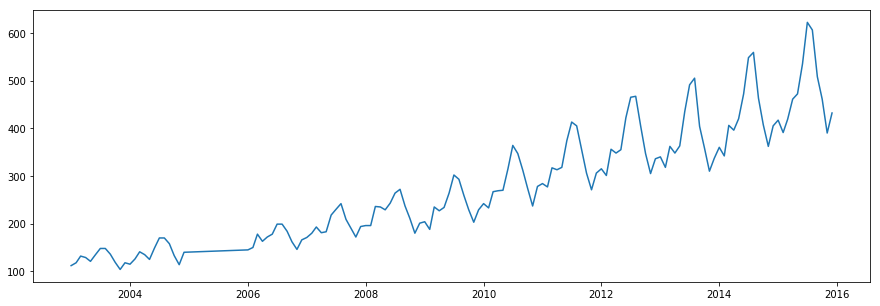

In [25]:
plt.figure(figsize=(15,5))
plt.plot(ts)
plt.show(block=False)

In [26]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).mean()
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show()
    
    #dicky-fuller test
    print('Results of dickey fuller test')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


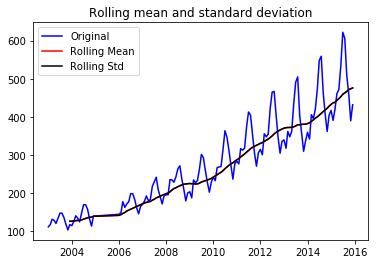

Results of dickey fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [27]:
test_stationarity(ts)

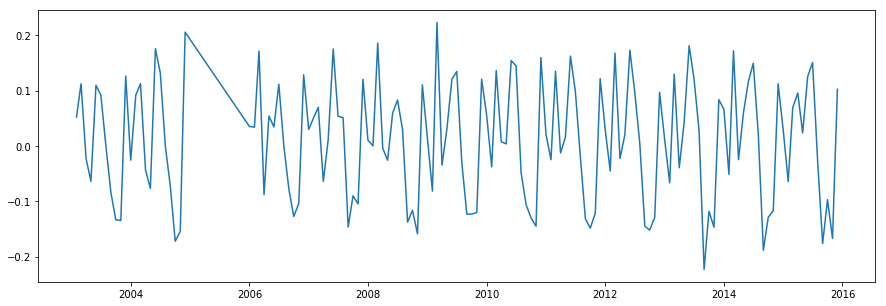

In [28]:
plt.figure(figsize=(15,5))
ts_log = np.log(ts)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

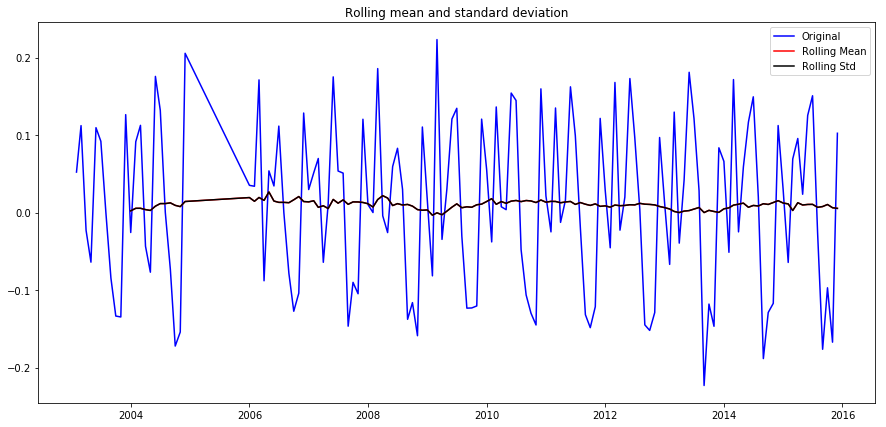

Results of dickey fuller test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [34]:
plt.figure(figsize=(15,7))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [31]:
lag_acf = acf(ts_log_diff, nlags = 10)
lag_pacf = pacf(ts_log_diff, nlags = 10, method='ols')

In [32]:
lag_acf

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704])

In [33]:
lag_pacf

array([ 1.        ,  0.20081508, -0.17368194, -0.09901213, -0.33527437,
        0.00872185, -0.07990745, -0.21923579, -0.5421352 , -0.22848913,
       -0.64775301])

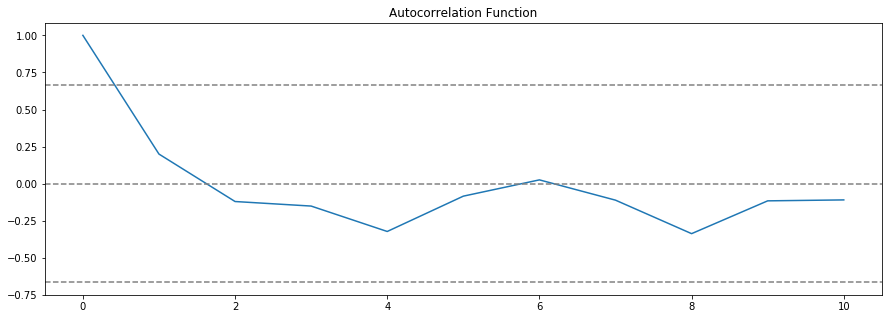

In [43]:
plt.figure(figsize=(15,5))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()

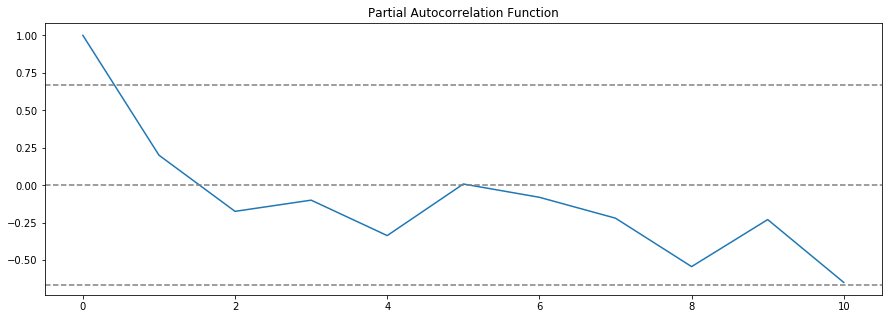

In [44]:
plt.figure(figsize=(15,5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
#Get 'p' value from PACF graph (where line intersects 0)
#get 'q' value from ACF graph (where it is intersecting upper confidence)

In [54]:
p = 2
q = 1
d = 1

In [55]:
testsize=15
train = ts_log[0:-15]
test = ts_log[-15:]
test

Month
2014-10-01    6.008813
2014-11-01    5.891644
2014-12-01    6.003887
2015-01-01    6.033086
2015-02-01    5.968708
2015-03-01    6.037871
2015-04-01    6.133398
2015-05-01    6.156979
2015-06-01    6.282267
2015-07-01    6.432940
2015-08-01    6.406880
2015-09-01    6.230481
2015-10-01    6.133398
2015-11-01    5.966147
2015-12-01    6.068426
Name: #Passengers, dtype: float64

In [56]:
history = [x for x in train]
prediction = []
history

[4.718498871295094,
 4.770684624465665,
 4.882801922586371,
 4.859812404361672,
 4.795790545596741,
 4.90527477843843,
 4.997212273764115,
 4.997212273764115,
 4.912654885736052,
 4.77912349311153,
 4.6443908991413725,
 4.770684624465665,
 4.74493212836325,
 4.836281906951478,
 4.948759890378168,
 4.90527477843843,
 4.8283137373023015,
 5.003946305945459,
 5.135798437050262,
 5.135798437050262,
 5.062595033026967,
 4.890349128221754,
 4.736198448394496,
 4.941642422609304,
 4.976733742420574,
 5.0106352940962555,
 5.181783550292085,
 5.093750200806762,
 5.147494476813453,
 5.181783550292085,
 5.293304824724492,
 5.293304824724492,
 5.214935757608986,
 5.087596335232384,
 4.983606621708336,
 5.111987788356544,
 5.14166355650266,
 5.19295685089021,
 5.262690188904886,
 5.198497031265826,
 5.209486152841421,
 5.384495062789089,
 5.438079308923196,
 5.488937726156687,
 5.342334251964811,
 5.25227342804663,
 5.147494476813453,
 5.267858159063328,
 5.278114659230517,
 5.278114659230517,
 5.4

In [58]:
history = [x for x in train]
prediction = []
for t in range(len(test)):
    model = ARIMA(history, order= (p,d,q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(float(yhat))
    actual_log = test[t]
    history.append(actual_log)
    print("Predicted Value", np.exp(yhat), "Actual Value", np.exp(actual_log))
    

Predicted Value [434.33227724] Actual Value 406.99999999999983
Predicted Value [412.89136466] Actual Value 362.00000000000017
Predicted Value [387.14427361] Actual Value 404.99999999999983
Predicted Value [455.89453776] Actual Value 417.0
Predicted Value [448.81254255] Actual Value 391.0
Predicted Value [416.15546974] Actual Value 418.9999999999999
Predicted Value [458.21942028] Actual Value 461.00000000000006
Predicted Value [492.11197658] Actual Value 471.99999999999983
Predicted Value [486.83151927] Actual Value 534.9999999999999
Predicted Value [548.7124393] Actual Value 621.9999999999999
Predicted Value [611.41472217] Actual Value 605.9999999999999
Predicted Value [564.0510907] Actual Value 508.00000000000006
Predicted Value [478.94654278] Actual Value 461.00000000000006


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Predicted Value [468.26559591] Actual Value 390.00000000000006
Predicted Value [411.45659791] Actual Value 432.00000000000017


In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,prediction)

0.008352344897340939

In [70]:
predictions_series = pd.Series(prediction, index = test.index)

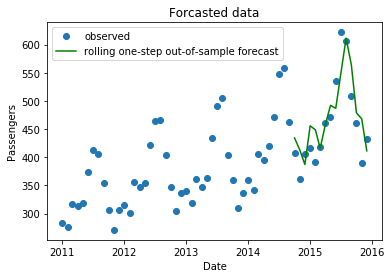

In [72]:
fig, ax = plt.subplots()
ax.set(title='Forcasted data', xlabel='Date', ylabel='Passengers')
ax.plot(ts[-60:], 'o', label='observed')
ax.plot(np.exp(predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')